In [97]:
#STEP 1 : IMPORT NECESSARY LIBRARY

In [312]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import binom,poisson,norm,t
import seaborn as sb


In [ ]:
2. Loading the data into the data frame


In [92]:
df_app=pd.read_csv('application_data.csv')

In [94]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
3. Checking the types of data


In [101]:
df_app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [103]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [105]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [106]:
df_app.shape

(307511, 122)

In [109]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
Checking the duplicate values

In [111]:
dup_app=df_app.duplicated().sum()

In [112]:
dup_app

0

In [115]:
#printing null values confirmation of every column in true and false present inside the application data file

df_app.isnull().sum


<bound method DataFrame.sum of         SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
...            ...     ...                 ...          ...           ...   
307506       False   False               False        False         False   
307507       False   False               False        False         False   
307508       False   False               False        False         False   
307509       False   False               False        False         False   
307510       False   False               False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_I

In [117]:
# Calculating the null values percentage 

null_app=df_app.isnull().mean()*100  

In [119]:
null_app

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [121]:

#storing percentages of null values in a variable
null_data1 = df_app.isnull().sum()/307511*100

In [123]:
null_data1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [ ]:
. Dropping the missing or null values.


In [125]:
app_col_null=null_app[null_app > 40].index

In [127]:
app_col_null

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [129]:
app_col_null.size

49

In [ ]:
. Dropping the duplicate rows


In [131]:
clean_app=df_app.drop(columns=app_col_null)

In [133]:
clean_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
clean_app.shape

(307511, 73)

In [137]:
df_app.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

In [139]:
#printing information about the new data frame
clean_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<Axes: >

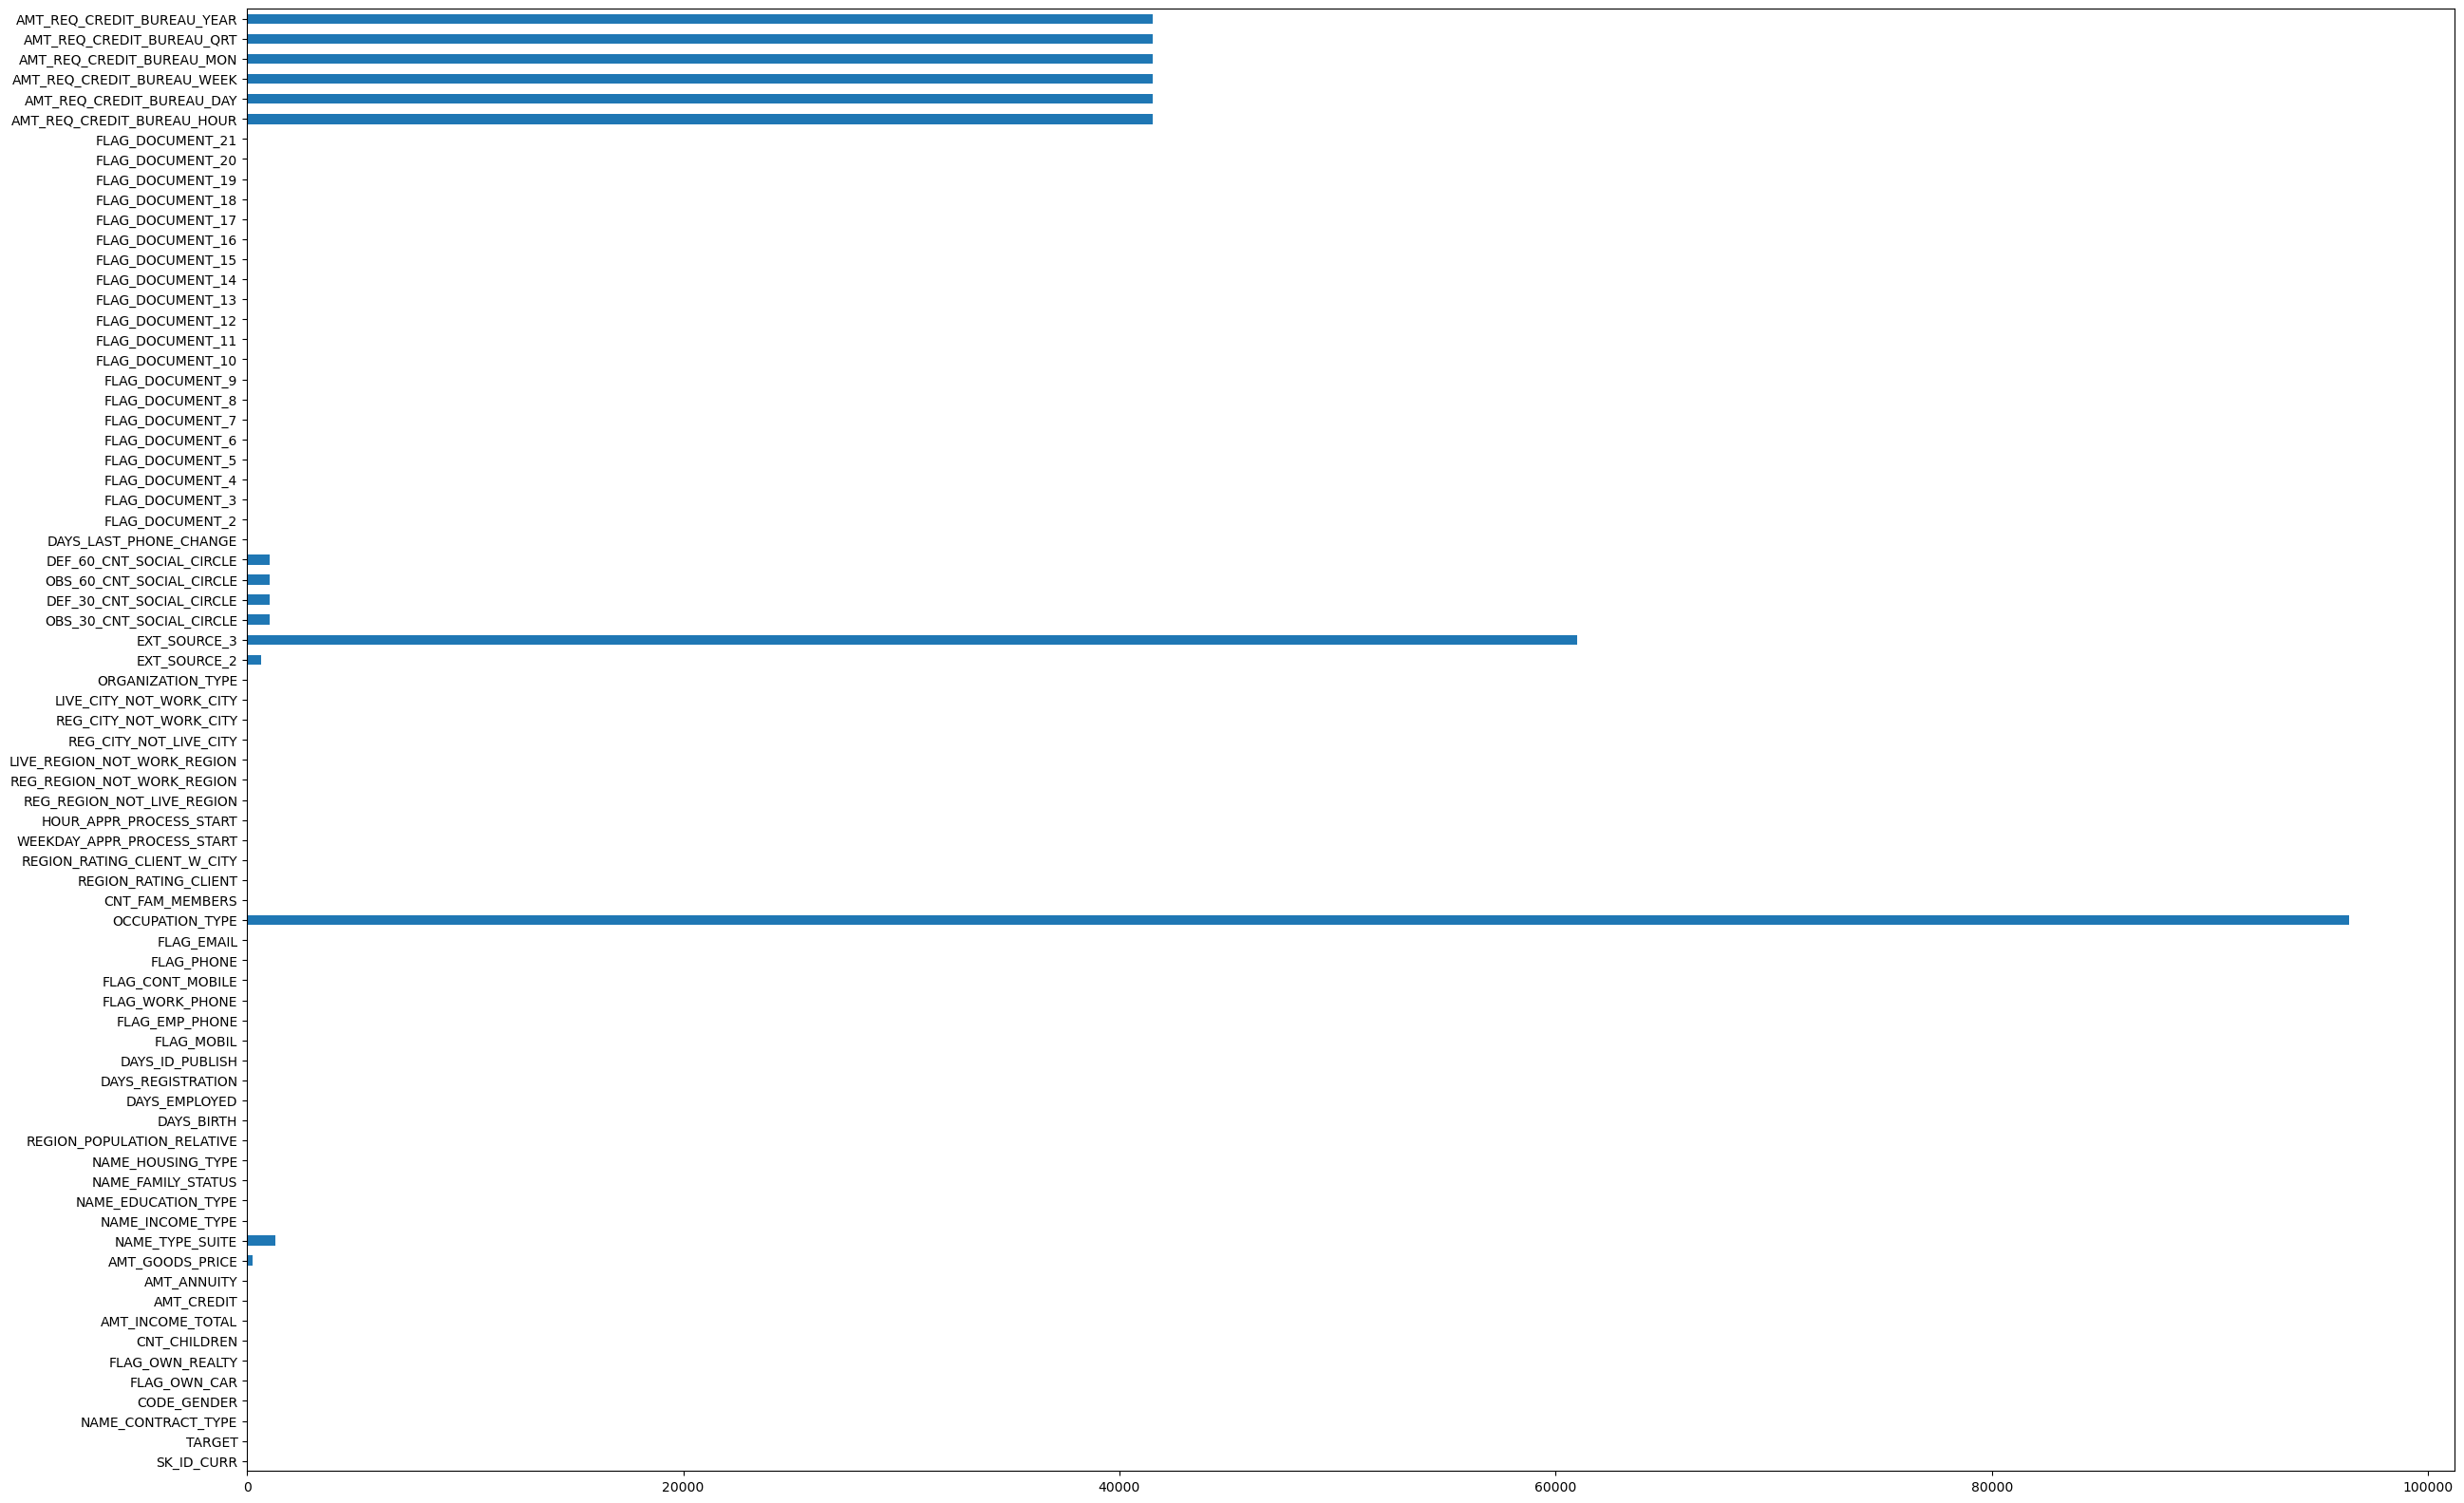

In [141]:
plt.figure(figsize=(30,20))
(clean_app.isna().sum()).plot.barh()

In [ ]:
By cheching above information we can say that 
'OCCUPATION TYPE' has maximum amount of null values

In [143]:
clean_app['OCCUPATION_TYPE'].value_counts().reset_index()

,OCCUPATION_TYPE,count
0,Laborers,55186
1,Sales staff,32102
2,Core staff,27570
3,Managers,21371
4,Drivers,18603
5,High skill tech staff,11380
6,Accountants,9813
7,Medicine staff,8537
8,Security staff,6721
9,Cooking staff,5946


In [145]:
clean_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


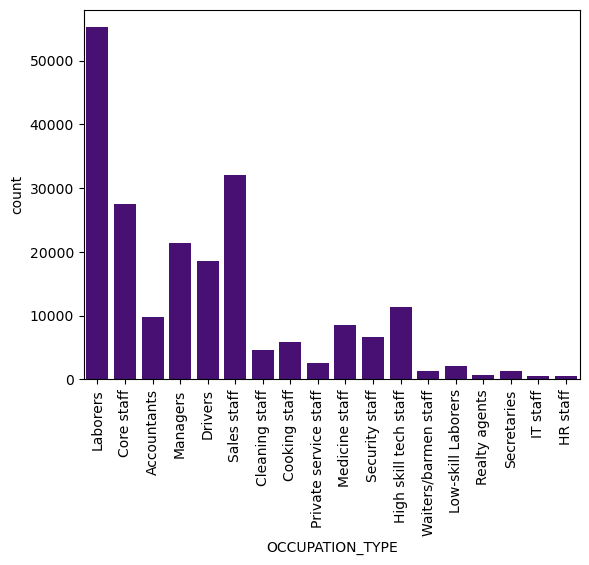

In [147]:
sb.countplot(data=clean_app,x='OCCUPATION_TYPE',color='indigo')
plt.xticks(rotation= 90)
plt.show()

In [ ]:
by checking above information and graph we can say that
most of the applicants of laon are from labours background.
average applicants are from core staff, managers, drivers and sales staff.
less applicants are from accountants, cleaning staff, cooking staff, private service staff, medicines staff, security staff and high skilled tech staff.

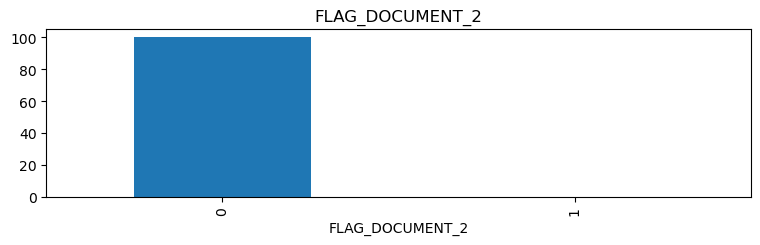

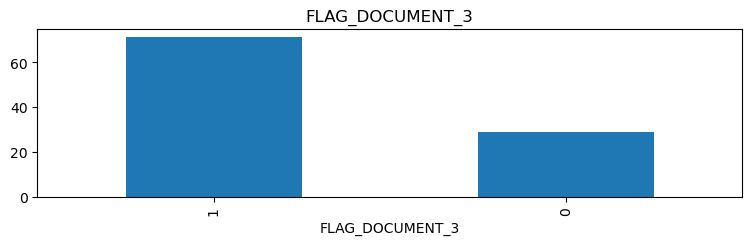

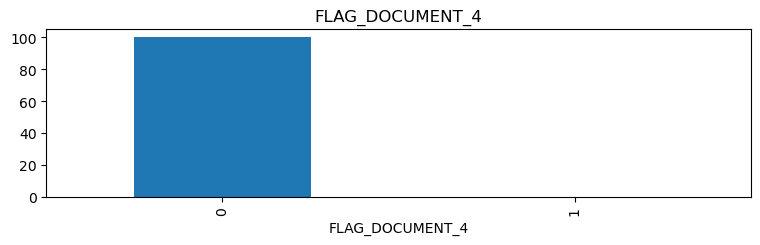

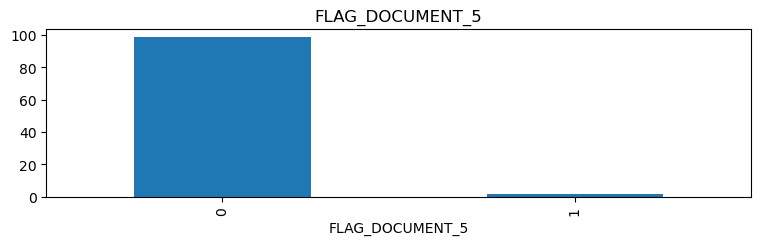

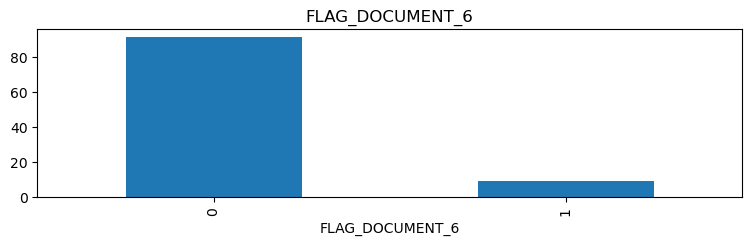

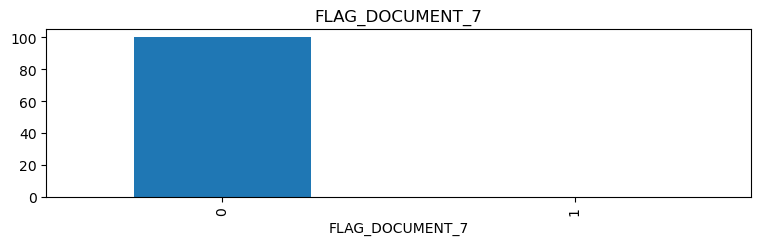

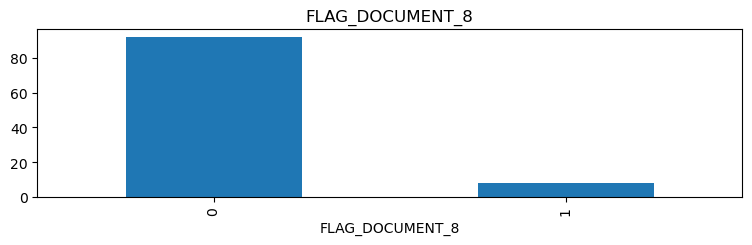

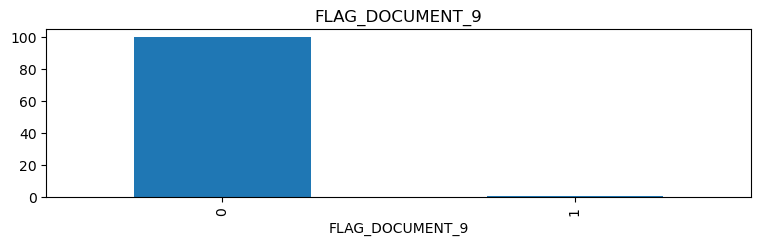

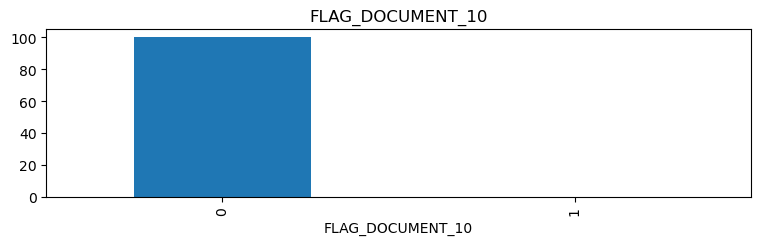

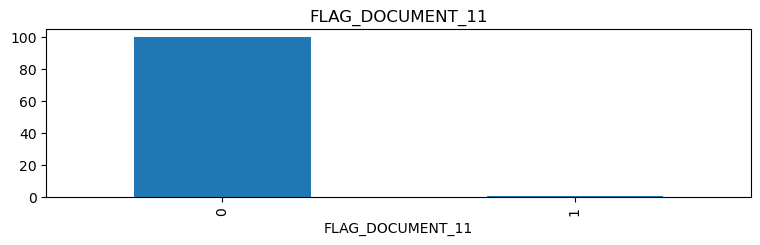

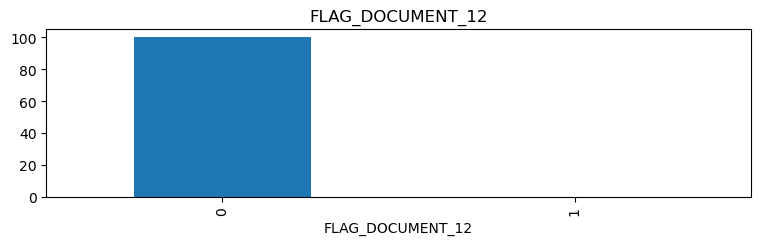

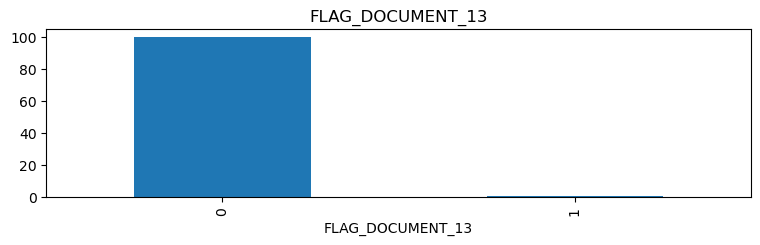

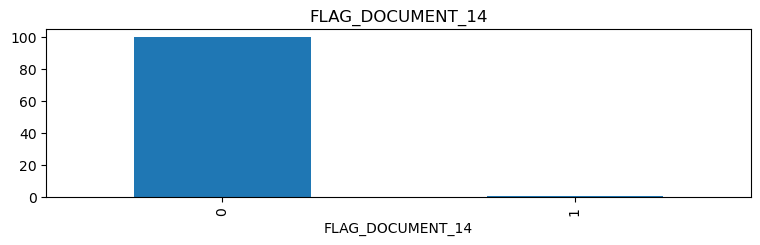

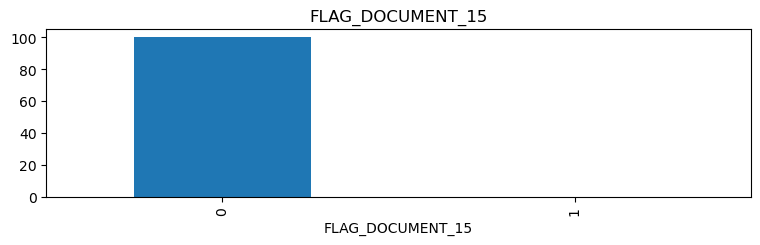

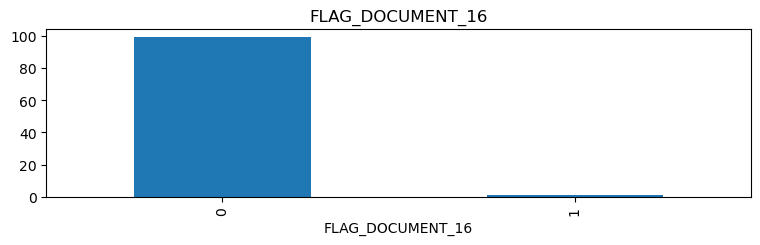

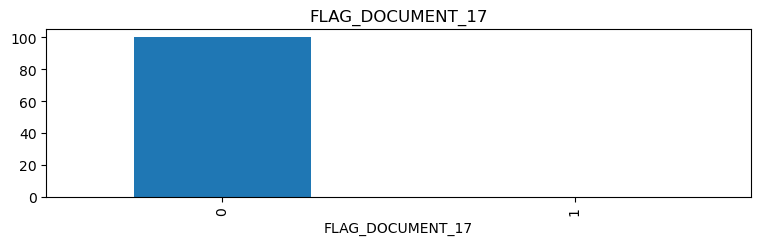

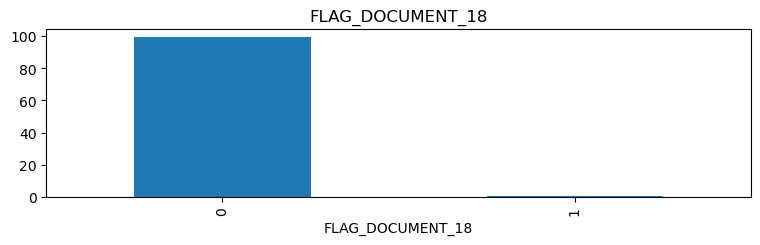

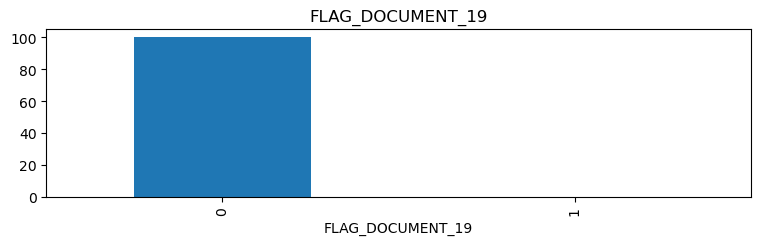

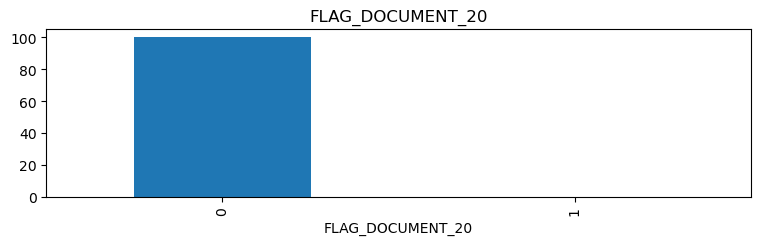

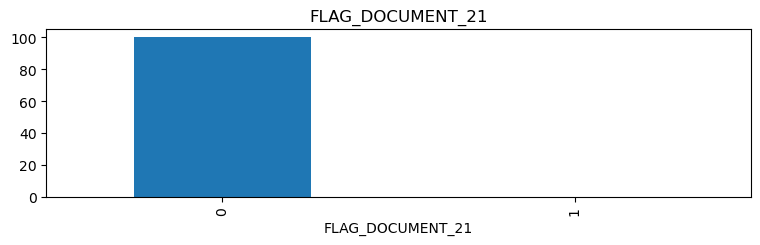

In [149]:
for i in clean_app.columns:
    if 'flag_document' in i.lower():
        plt.figure(figsize=(20,10))
        plt.subplot(4,2,1)
        plt.title(i)
        (df_app[i].value_counts()*100/df_app.shape[0]).plot.bar()

In [ ]:
> In above pie chart graph showing that the count of documents which are not provided by the applicant 
> So thats why we are removing columns which are related to the flag.

In [150]:
df_app.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [155]:
flag = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE',
                'FLAG_EMAIL','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']


In [157]:
flag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [159]:
clean_app.drop(flag,axis=1,inplace=True,errors='ignore')


In [161]:
clean_app.shape

(307511, 50)

<Axes: >

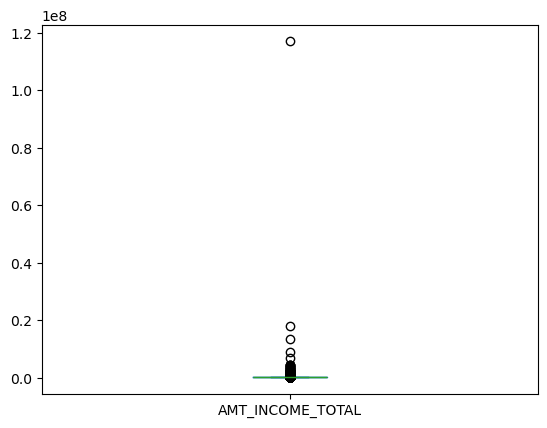

In [266]:
#Plotting graphs of the outliers

(clean_app['AMT_INCOME_TOTAL']).plot.box()


<Axes: >

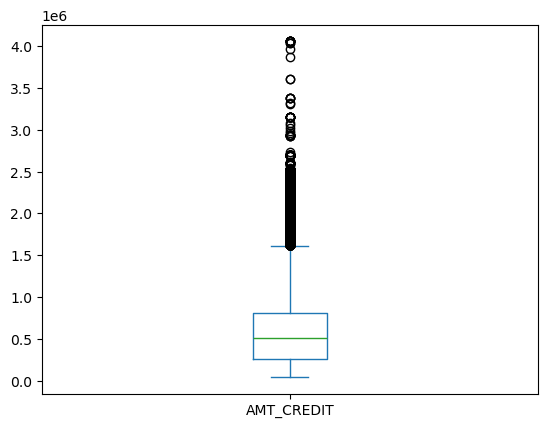

In [270]:
(clean_app['AMT_CREDIT']).plot.box()

<Axes: >

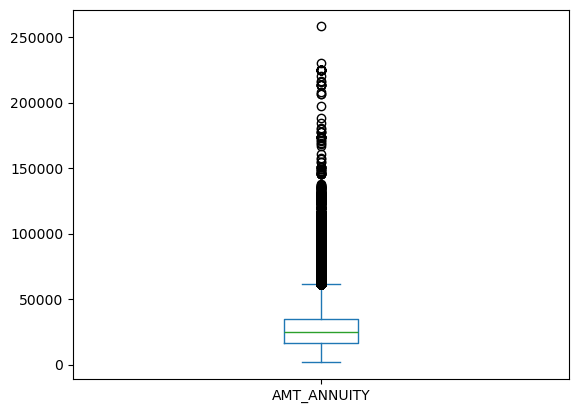

In [280]:
(clean_app['AMT_ANNUITY']).plot.box()

In [300]:
#printing corelations with each of the columns
clean_app.

ValueError: could not convert string to float: 'Cash loans'

In [292]:
numeric_data = clean_app.select_dtypes(include=[np.number])


In [296]:
numeric_data = numeric_data.fillna(0)  # Replace NaN with 0


In [ ]:
Cleaning Previous Application Data

In [163]:
df_pre=pd.read_csv('previous_application.csv')

In [164]:
df_pre

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062622,1613827,403169,Cash loans,9065.880,135000.0,152820.0,NaN,135000.0,MONDAY,12.0,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-611.0,79.0,365243.0,365243.0,1.0
1062623,2098261,362716,Revolving loans,NaN,0.0,0.0,NaN,NaN,MONDAY,16.0,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1062624,2044793,131251,Cash loans,89804.475,1282500.0,1338367.5,NaN,1282500.0,MONDAY,10.0,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-581.0,-71.0,-341.0,-339.0,1.0
1062625,2047460,398542,Cash loans,11067.165,270000.0,343062.0,NaN,270000.0,THURSDAY,10.0,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df_pre.info

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1062622     1613827      403169         Cash loans     9065.880   
1062623     2098261      362716    Revolving loans          NaN   
1062624     2044793      131251         Cash loans    89804.475   
1062625     2047460      398542         Cash loans    11067.165   
1062626     2757859      374407         Cash loans    19708.335   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

In [171]:
len(df_pre)

1062627

In [173]:
df_pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.062627e+06,1.062627e+06,826613.000000,1.062627e+06,1.062626e+06,4.959020e+05,8.185270e+05,1.062626e+06,1.062626e+06,495902.000000,...,3768.000000,1.062626e+06,1.062626e+06,826615.000000,636432.000000,636432.000000,636432.000000,636432.000000,636432.000000,636432.000000
mean,1.922733e+06,2.784202e+05,15888.674642,1.742247e+05,1.949416e+05,6.708009e+03,2.262043e+05,1.248607e+01,9.964136e-01,0.079648,...,0.775057,-8.822190e+02,3.184516e+02,15.992048,342382.983144,13833.433740,33618.262338,76572.199894,81969.840036,0.331410
std,5.328940e+05,1.028573e+05,14743.128198,2.910001e+05,3.167992e+05,2.094089e+04,3.133549e+05,3.332775e+00,5.977909e-02,0.107916,...,0.099470,7.793427e+02,7.945776e+03,14.504115,88603.379525,72459.801731,106649.140130,149639.963669,153288.694194,0.470721
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460638e+06,1.893660e+05,6300.405000,1.894050e+04,2.429550e+04,0.000000e+00,5.061150e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.304000e+03,-1.000000e+00,6.000000,365243.000000,-1627.000000,-1242.000000,-1313.000000,-1269.000000,0.000000
50%,1.923328e+06,2.787750e+05,11250.000000,7.083450e+04,8.028000e+04,1.629000e+03,1.115370e+05,1.200000e+01,1.000000e+00,0.051168,...,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384306e+06,3.677235e+05,20518.875000,1.800000e+05,2.152080e+05,7.758000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,...,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [174]:
null2=df_pre.isnull().median()*100
null2

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                      0.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT               100.0
AMT_GOODS_PRICE                  0.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT              100.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                  0.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

In [177]:
#checking columns with null values less than 40% and storing it another data frame
drop_pre=null2[null2 > 40].index
drop_pre


Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [179]:
#deleting the columns which are having null values more than 40 null values
prev_cleaned = df_pre.drop(columns=drop_pre)

In [181]:
prev_cleaned 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15.0,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11.0,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11.0,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7.0,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9.0,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062622,1613827,403169,Cash loans,9065.880,135000.0,152820.0,135000.0,MONDAY,12.0,Y,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-611.0,79.0,365243.0,365243.0,1.0
1062623,2098261,362716,Revolving loans,NaN,0.0,0.0,NaN,MONDAY,16.0,Y,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1062624,2044793,131251,Cash loans,89804.475,1282500.0,1338367.5,1282500.0,MONDAY,10.0,Y,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-581.0,-71.0,-341.0,-339.0,1.0
1062625,2047460,398542,Cash loans,11067.165,270000.0,343062.0,270000.0,THURSDAY,10.0,Y,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
dup_pre=df_pre.duplicated().sum()

In [184]:
dup_pre

0

In [185]:
#printing the count of null values which are still remained to remove
prev_cleaned.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    236014
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                244100
WEEKDAY_APPR_PROCESS_START          1
HOUR_APPR_PROCESS_START             1
FLAG_LAST_APPL_PER_CONTRACT         1
NFLAG_LAST_APPL_IN_DAY              1
NAME_CASH_LOAN_PURPOSE              1
NAME_CONTRACT_STATUS                1
DAYS_DECISION                       1
NAME_PAYMENT_TYPE                   1
CODE_REJECT_REASON                  1
NAME_TYPE_SUITE                521904
NAME_CLIENT_TYPE                    1
NAME_GOODS_CATEGORY                 1
NAME_PORTFOLIO                      1
NAME_PRODUCT_TYPE                   1
CHANNEL_TYPE                        1
SELLERPLACE_AREA                    1
NAME_SELLER_INDUSTRY                1
CNT_PAYMENT                    236012
NAME_YIELD_GROUP                    1
PRODUCT_COMB

<Axes: >

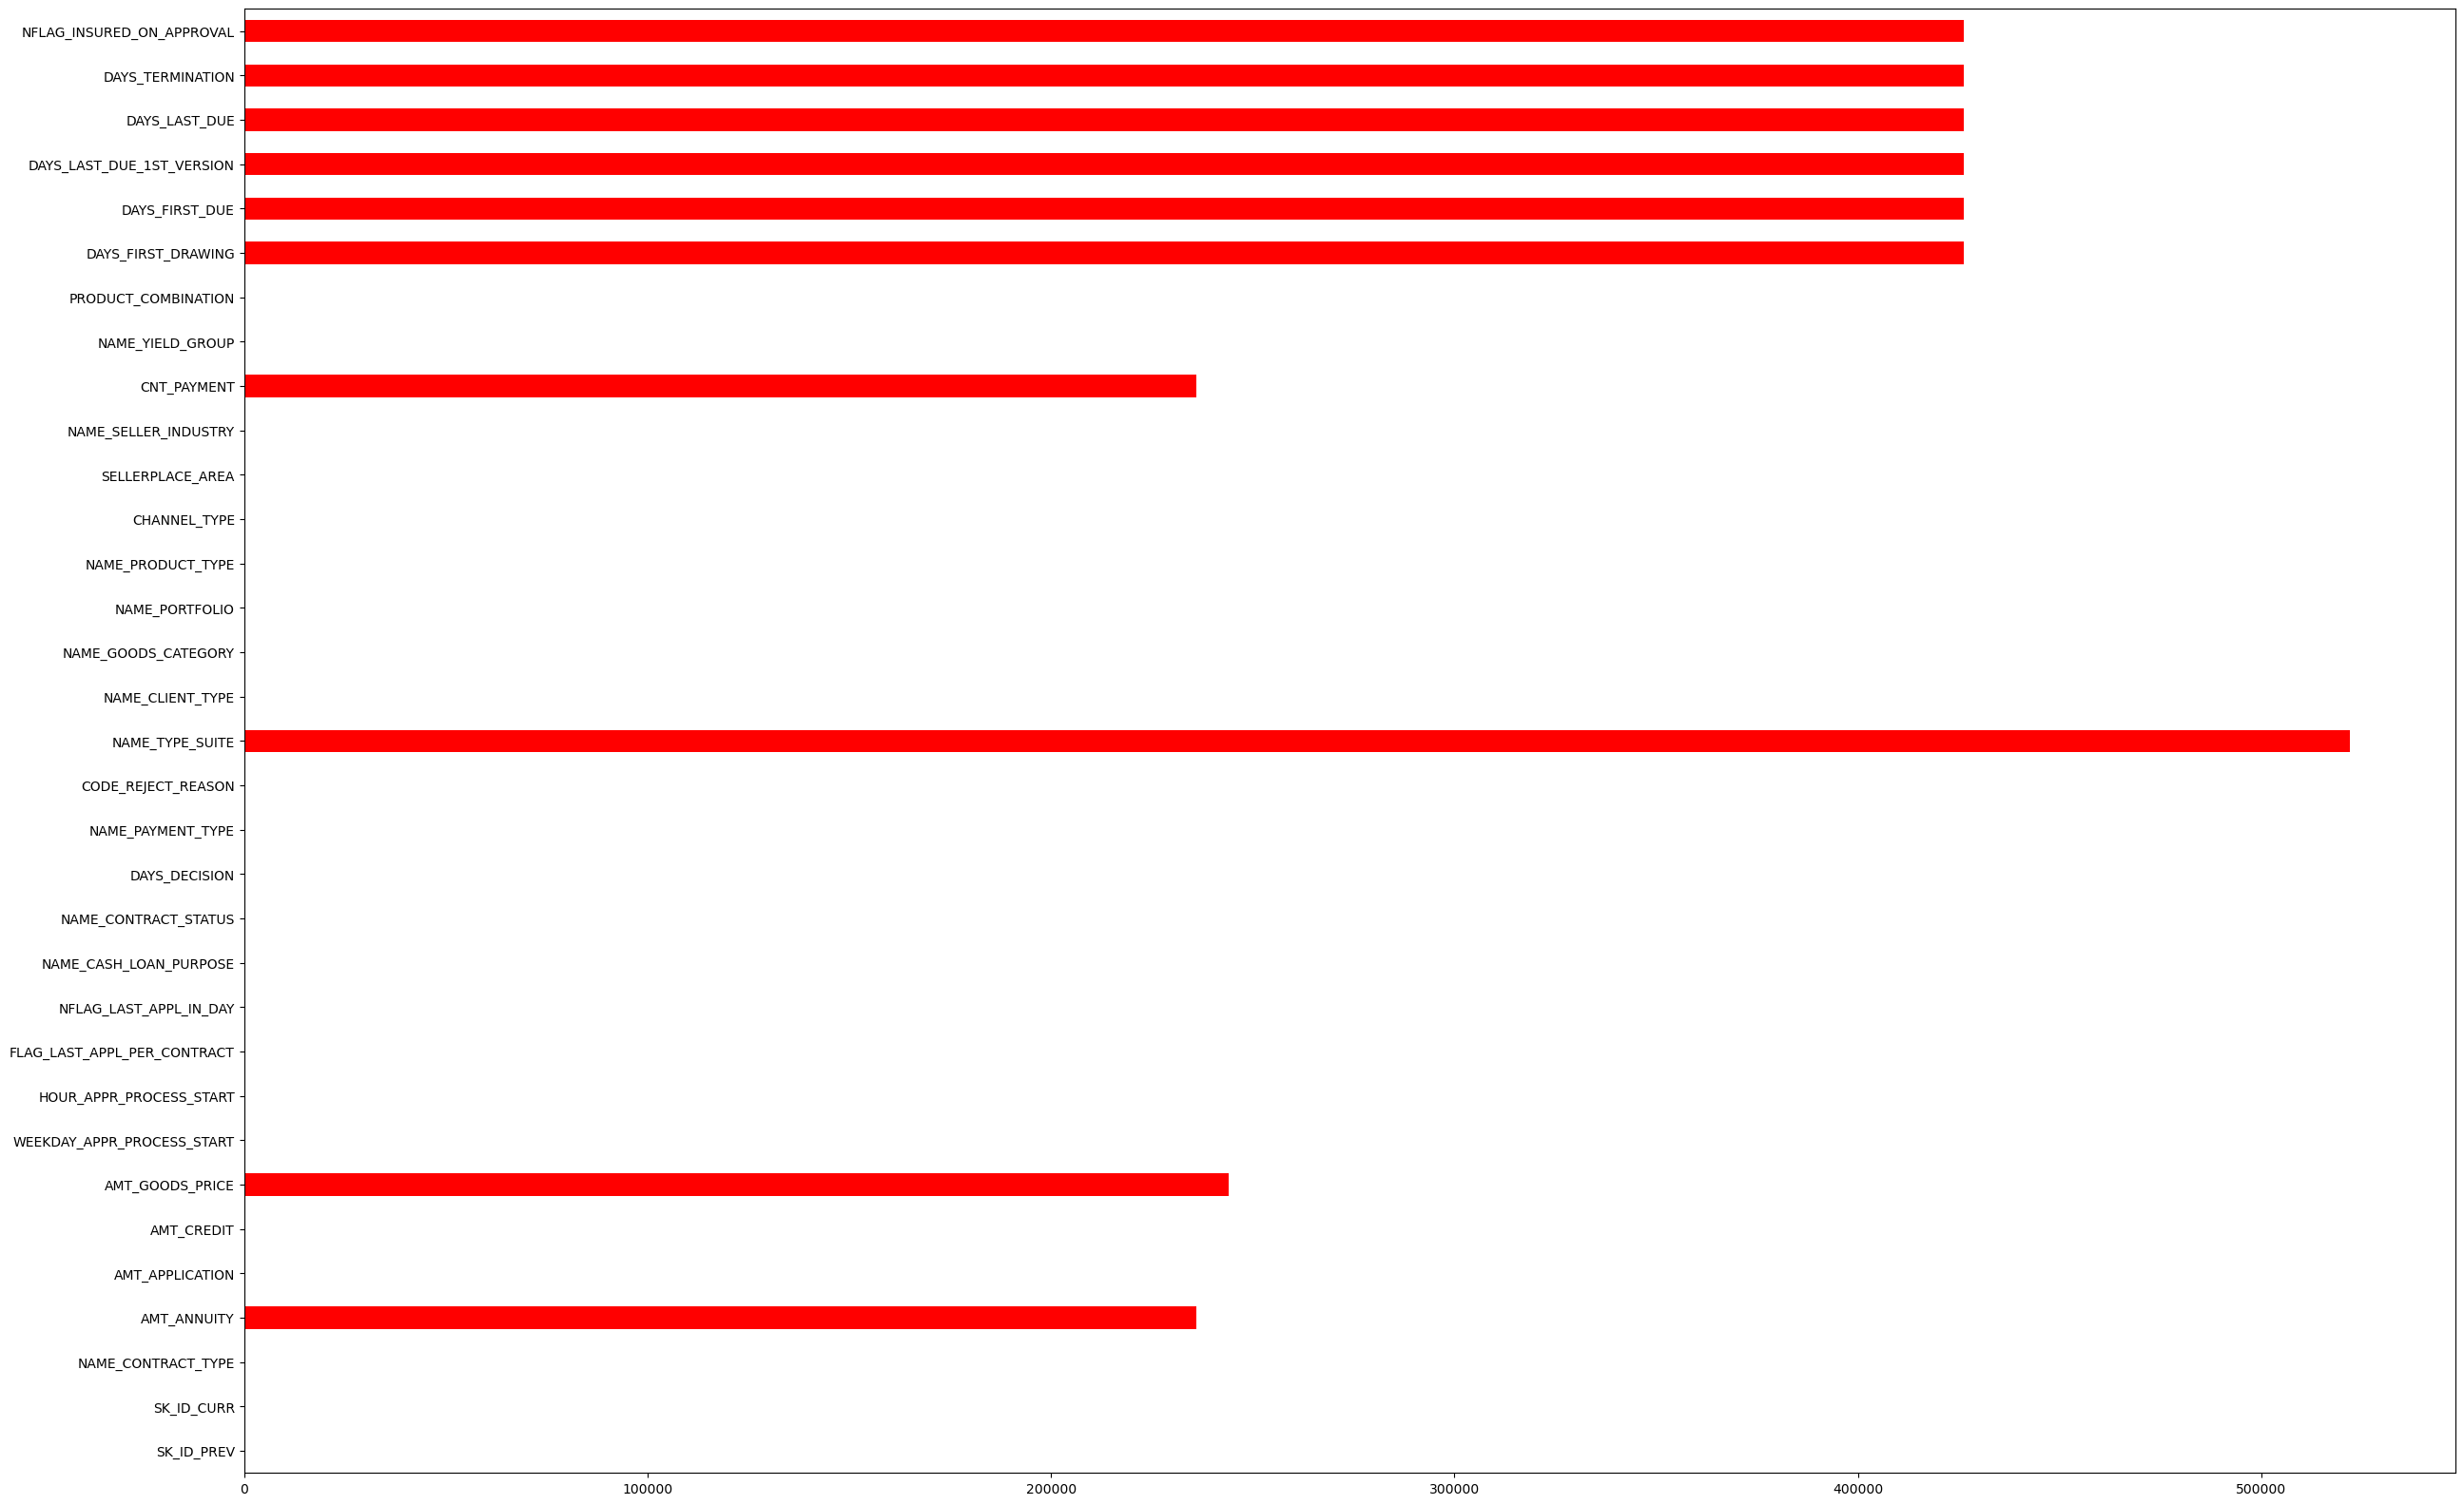

In [186]:
#plotting graph of remaining columns to remove
plt.figure(figsize=(30,20))
(prev_cleaned.isna().sum()).plot.barh(color='red')


In [ ]:
filling data where values are null

In [ ]:
there are 3 columns which are having null values.
so we are going to fill values where value is null.


In [202]:
prev_cleaned.drop(['CNT_PAYMENT','AMT_GOODS_PRICE','AMT_ANNUITY'], axis=1, inplace=True)

KeyError: "['CNT_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY'] not found in axis"

In [196]:
prev_cleaned

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15.0,Y,1.0,XAP,...,35.0,Connectivity,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11.0,Y,1.0,XNA,...,-1.0,XNA,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11.0,Y,1.0,XNA,...,-1.0,XNA,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7.0,Y,1.0,XNA,...,-1.0,XNA,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9.0,Y,1.0,Repairs,...,-1.0,XNA,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062622,1613827,403169,Cash loans,135000.0,152820.0,MONDAY,12.0,Y,1.0,XNA,...,-1.0,XNA,middle,Cash X-Sell: middle,365243.0,-611.0,79.0,365243.0,365243.0,1.0
1062623,2098261,362716,Revolving loans,0.0,0.0,MONDAY,16.0,Y,1.0,XAP,...,-1.0,XNA,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1062624,2044793,131251,Cash loans,1282500.0,1338367.5,MONDAY,10.0,Y,1.0,XNA,...,-1.0,XNA,low_normal,Cash X-Sell: low,365243.0,-581.0,-71.0,-341.0,-339.0,1.0
1062625,2047460,398542,Cash loans,270000.0,343062.0,THURSDAY,10.0,Y,1.0,XNA,...,-1.0,XNA,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
prev_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062627 entries, 0 to 1062626
Data columns (total 30 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1062627 non-null  int64  
 1   SK_ID_CURR                   1062627 non-null  int64  
 2   NAME_CONTRACT_TYPE           1062627 non-null  object 
 3   AMT_APPLICATION              1062627 non-null  float64
 4   AMT_CREDIT                   1062626 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1062626 non-null  object 
 6   HOUR_APPR_PROCESS_START      1062626 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  1062626 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1062626 non-null  float64
 9   NAME_CASH_LOAN_PURPOSE       1062626 non-null  object 
 10  NAME_CONTRACT_STATUS         1062626 non-null  object 
 11  DAYS_DECISION                1062626 non-null  float64
 12  NAME_PAYMENT_TYPE            1062626 non-n

In [204]:
prev_cleaned.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
AMT_CREDIT                          1
WEEKDAY_APPR_PROCESS_START          1
HOUR_APPR_PROCESS_START             1
FLAG_LAST_APPL_PER_CONTRACT         1
NFLAG_LAST_APPL_IN_DAY              1
NAME_CASH_LOAN_PURPOSE              1
NAME_CONTRACT_STATUS                1
DAYS_DECISION                       1
NAME_PAYMENT_TYPE                   1
CODE_REJECT_REASON                  1
NAME_TYPE_SUITE                521904
NAME_CLIENT_TYPE                    1
NAME_GOODS_CATEGORY                 1
NAME_PORTFOLIO                      1
NAME_PRODUCT_TYPE                   1
CHANNEL_TYPE                        1
SELLERPLACE_AREA                    1
NAME_SELLER_INDUSTRY                1
NAME_YIELD_GROUP                    1
PRODUCT_COMBINATION               227
DAYS_FIRST_DRAWING             426195
DAYS_FIRST_DUE                 426195
DAYS_LAST_DU

In [206]:
#removing the 'PRODUCT_COMBINATION' column because it having null values

prev_cleaned.dropna(inplace=True)


In [210]:
#count of rows and columns of the data
prev_cleaned.shape

(407186, 30)

In [214]:
#printing the count of null values which are having null values
prev_cleaned.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMINATION               0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int

In [ ]:
Merging both datas together by using inner join

In [236]:
merge_df = pd.merge(prev_cleaned,clean_app,how='inner',on='SK_ID_CURR')


In [238]:
merge_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_APPLICATION,AMT_CREDIT_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11.0,Y,1.0,XNA,...,0.0,0.0,-517.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11.0,Y,1.0,XNA,...,4.0,0.0,-301.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8.0,Y,1.0,Everyday expenses,...,0.0,0.0,-684.0,0,0.0,0.0,1.0,0.0,0.0,5.0
3,1715995,447712,Cash loans,270000.0,335754.0,FRIDAY,7.0,Y,1.0,XNA,...,5.0,0.0,-366.0,0,0.0,0.0,0.0,0.0,1.0,5.0
4,2257824,161140,Cash loans,211500.0,246397.5,FRIDAY,10.0,Y,1.0,XNA,...,4.0,1.0,-1278.0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346126,1322922,231499,Consumer loans,92610.0,92610.0,TUESDAY,19.0,Y,1.0,XAP,...,0.0,0.0,-2244.0,0,0.0,0.0,0.0,0.0,0.0,4.0
346127,2013811,114528,Consumer loans,144000.0,129600.0,FRIDAY,12.0,Y,1.0,XAP,...,0.0,0.0,-644.0,0,NaN,NaN,NaN,NaN,NaN,NaN
346128,2229719,240385,Cash loans,270000.0,284611.5,MONDAY,12.0,Y,1.0,XNA,...,6.0,0.0,-2501.0,0,0.0,0.0,0.0,0.0,2.0,5.0
346129,2689324,250580,Cash loans,225000.0,254700.0,WEDNESDAY,13.0,Y,1.0,XNA,...,3.0,0.0,-1316.0,0,0.0,0.0,0.0,0.0,1.0,5.0


In [240]:
#count of rows and columns of the data
merge_df.shape

(346131, 79)

<Axes: xlabel='TARGET', ylabel='count'>

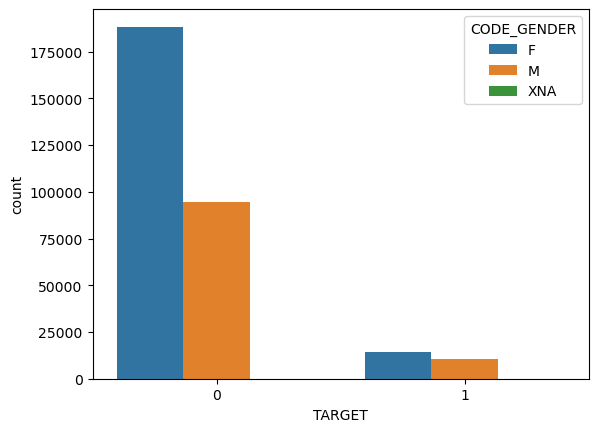

In [308]:
sb.countplot(data = clean_app, x= 'TARGET', order = clean_app['TARGET'].value_counts().index,hue= 'CODE_GENDER')

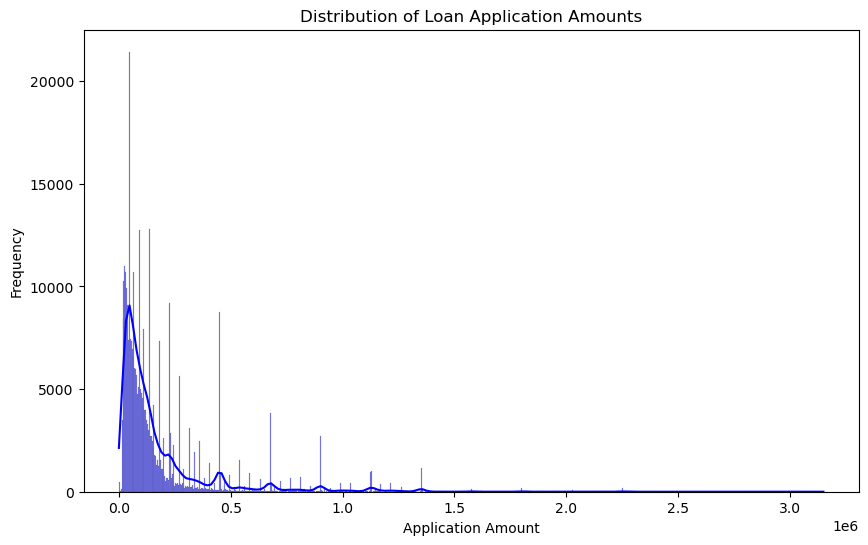

In [314]:
# Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=merge_df, x='AMT_APPLICATION', kde=True, color='blue')
plt.title("Distribution of Loan Application Amounts")
plt.xlabel("Application Amount")
plt.ylabel("Frequency")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3692\799148634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merge_df, x='WEEKDAY_APPR_PROCESS_START_x', order=['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'], palette="viridis")


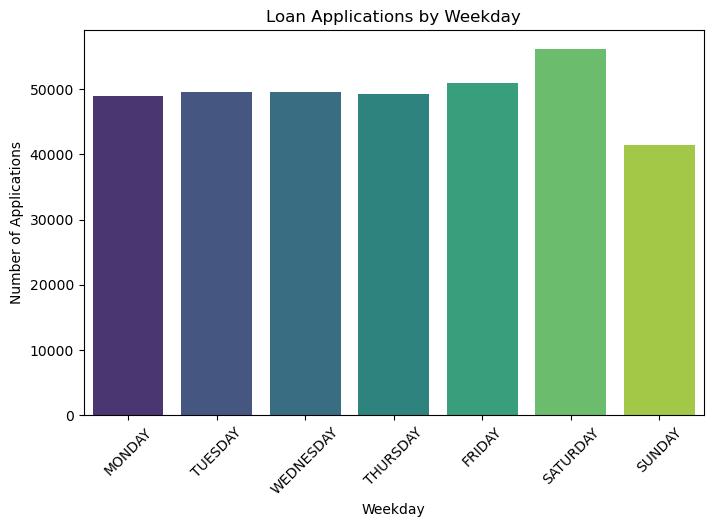

In [316]:
# Applications by Weekday
plt.figure(figsize=(8, 5))
sns.countplot(data=merge_df, x='WEEKDAY_APPR_PROCESS_START_x', order=['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'], palette="viridis")
plt.title("Loan Applications by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.show()

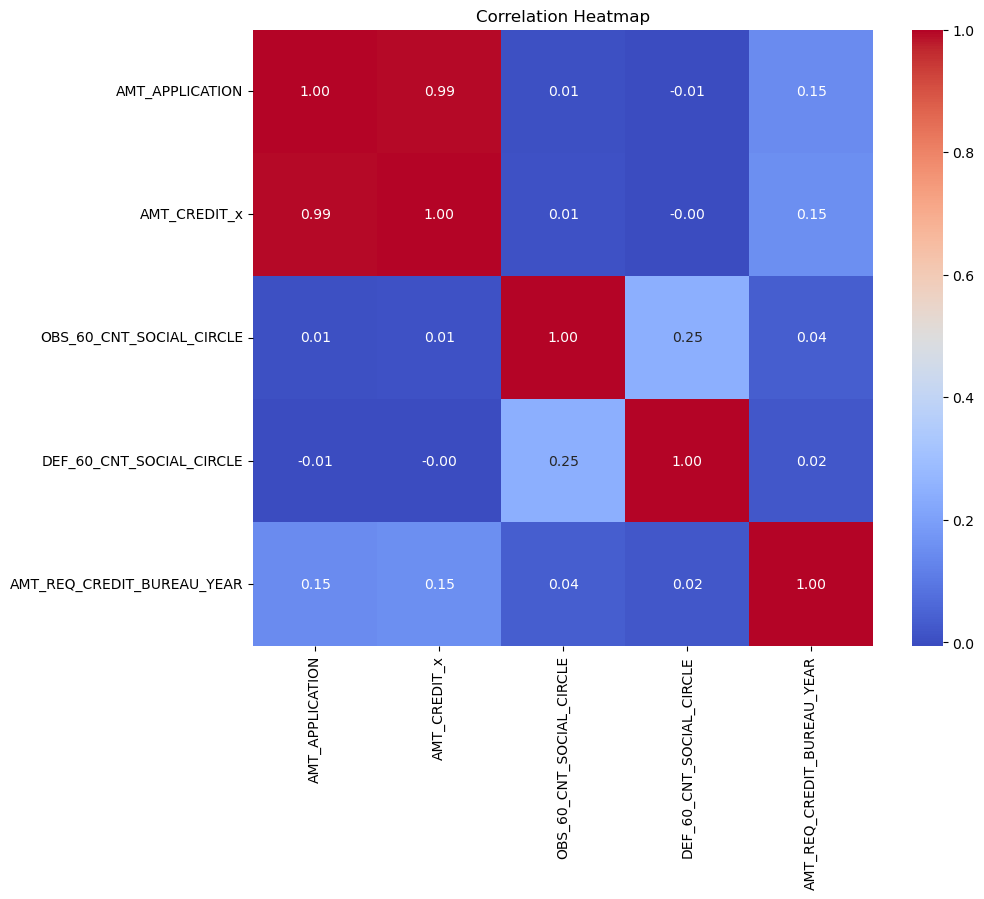

In [318]:
# Correlation Heatmap
correlation_columns = ['AMT_APPLICATION', 'AMT_CREDIT_x', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR']
correlation_data = merge_df[correlation_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Conclusion:
The data shows that most people apply for cash loans,
with applications mainly happening on Tuesdays to Thursday 
and during mid-day hours. The loan amounts vary, with some 
applicants asking for small amounts and others for much larger 
sums. Most loans are for everyday expenses, while a few are for
specific needs like home improvement or medical costs. 
Older people with stable jobs tend to apply for higher loans.
Credit checks are important for larger loans, but social circle
defaults have little effect on loan approval, meaning financial 
stability matters more than social connections.







